# Position of a quasar

You measure the position of a quasar $N$ times with the *same* telescope i.e. errors are homoscedastic. Let's say the true position is $\mu = 1$ (in suitable units) and the erorrs are $\sigma=0.2$

### Part 1

- Generate fake measurements. Treat each of these observations as an estimate of the true distribution. So we'll center a Gaussian (with the known $\sigma$) at each point. This is the probability of each data point, $p(x_i|\mu,\sigma)$.
- Plot each of the individual likelihoods separately.  Also plot their product (i.e. the likelihood of the dataset $\{x_i\}$). Make sure the x grid has enough points.
- Just read off the maximum likelihood solution (e.g. using `np.argsort`) 
- Compare it with the MLE estimator derived above

### Part 2

Check the Fisher matrix error estimate makes sense
- do a rough $2^\mathrm{nd}$ order differentation of our log-likelihood function with `np.diff`, 
- divide through by our $\Delta \theta^2$ to get the correct normalization, 
- multiply by $-1$, 
- then take the square root.
- Compare with the Fisher matrix error derived above
- Plot a Gaussian at the measured $\mu$ with this error as the scale to see if it matches the numerical likelihood distribution. (The normalization won't be captured, you can rescale it as you like to check it agrees) 

### Part 3

Let's make our model more realistic. Our $N$ measurements were taken in different nights, where the sky behaved differently (i.e. errors are heteoscedastic). Let's assume that each measurment has a $\sigma_i$ that is normally distribured with mean $0.2$ and standard deviation $0.05$

- Generalize your code from above to this case

# Part 1

### Constraints

In [1]:
true_mu = 1
sigma = 0.2 
N = 10

I then generate the N "fake" measurements: 

In [2]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

In [3]:
x_norm = norm.rvs(true_mu, sigma, N)

I evaluate the likelihood for each estimator: 

In [4]:
def log_likelihood(x_array, x_bar, sigma):
    
    return - 1 / 2 * np.log(2 * np.pi) + 2 * np.log(sigma) - (x_array - x_bar)**2 / (2 * sigma ** 2)

Now I plot the log_liklihood for the N-generated points: 

In [5]:
x_i = np.linspace(0, 6, 1000)

In [6]:
log_likelihoods = np.array([log_likelihood(x_i, x_norm[n], sigma) for n in range(0, N)])

Text(0, 0.5, 'log_likelihood')

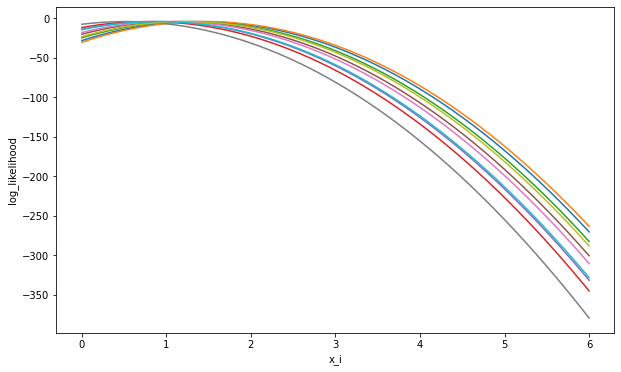

In [7]:
plt.figure(figsize=(10, 6))

for i in range(0, N): 
    
    plt.plot(x_i, log_likelihoods[i])
    
plt.xlabel("x_i")
plt.ylabel("log_likelihood")

I evaluate the sum of the log_likelihoods to obtain the total log_likelihood and then see the maximum value: 

In [8]:
sum_log_likelihood = np.sum(log_likelihoods,axis=0)
max_likelihood = x_i[np.argmax(sum_log_likelihood)]
estimator_max_likelihood = np.mean(x_norm)

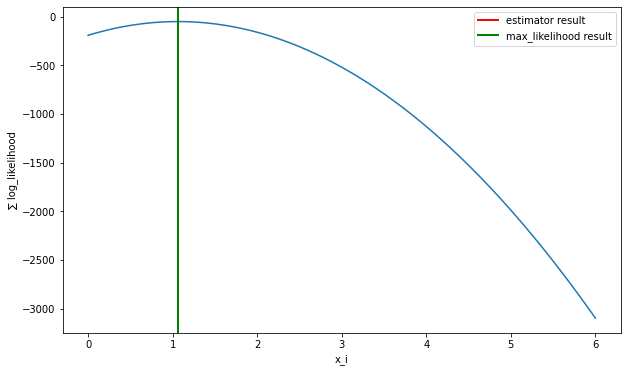

In [9]:
plt.figure(figsize=(10, 6))
plt.plot(x_i, sum_log_likelihood)
plt.axvline(x = estimator_max_likelihood, color = 'red', label = 'estimator result', lw=2)
plt.axvline(x = max_likelihood, color = 'green', label = 'max_likelihood result', lw=2)

plt.xlabel("x_i")
plt.ylabel("∑ log_likelihood")
plt.legend();

The two peaks are not distinguishable in the plot so I check their values: 

In [10]:
print(max_likelihood, estimator_max_likelihood)

1.063063063063063 1.0630097679531898


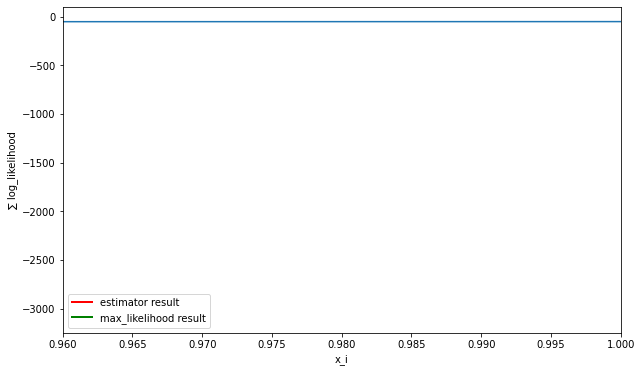

In [11]:
plt.figure(figsize=(10, 6))
plt.plot(x_i, sum_log_likelihood)
plt.axvline(x = estimator_max_likelihood, color = 'red', label = 'estimator result', lw=2)
plt.axvline(x = max_likelihood, color = 'green', label = 'max_likelihood result', lw=2)

plt.xlabel("x_i")
plt.xlim(0.96, 1.0)  # add this range to see their value
plt.ylabel("∑ log_likelihood")
plt.legend();

# Part 2

I first start with a rough $2^{nd}$ order differentiation of my log_likelihood (the sum). 

In [12]:
diff = np.diff(sum_log_likelihood, n=2)

I divide by $\Delta\sigma^{2}$ to get the normalization (to obtain $\Delta^2 L / \Delta \Theta^2$): 

In [13]:
sec_der = np.sqrt(-1 * diff / (x_i[1] - x_i[0])**2)

Then I extrapolate the value from this estimate: 

In [14]:
fisher = 1/sec_der[0]

In [15]:
estimator = sigma/np.sqrt(N)

I plot my log-likelihood with the fisher estimate I got and see if the two are compatible (by a scale factor): 

In [16]:
distribution = log_likelihood(x_i, max_likelihood, estimator)
distribution_unc_est = log_likelihood(x_i, max_likelihood, fisher)

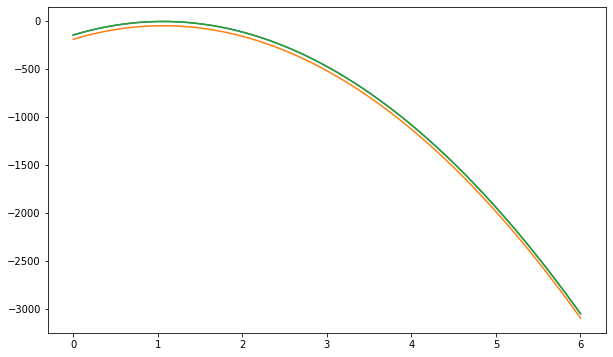

In [17]:
plt.figure(figsize=(10, 6))
plt.plot(x_i, distribution, label="estimator-centered distribution")
plt.plot(x_i, sum_log_likelihood, label="original distribution")
plt.plot(x_i, distribution_unc_est, label="fisher-result centered distribution")

They are! Since I do not distinguish the two lines, I manually check the values I obtained:

In [18]:
print("fisher :", fisher, "estimator:", estimator)

fisher : 0.06324555320320374 estimator: 0.06324555320336758


# Part 3

## 1) Mean value as max(L($\Theta$)) estimator 

In [19]:
# constants: 

std_dev_sigma = 0.05

In [20]:
sigma_norm = norm.rvs(sigma, std_dev_sigma, N)  # generate 10 sigmas within the given interval
x_norm_hetero = norm.rvs(true_mu, sigma_norm)  # generate correspondent x_norm

I will keep the $\textit{x_i}$ array to plot the different log_likelihoods: 

In [21]:
log_likelihoods_hetero = np.array([log_likelihood(x_i, x_norm_hetero[n], sigma_norm[n]) for n in range(0, N)])

And then proceed to plot them: 

Text(0, 0.5, 'log_likelihood (heterodastic)')

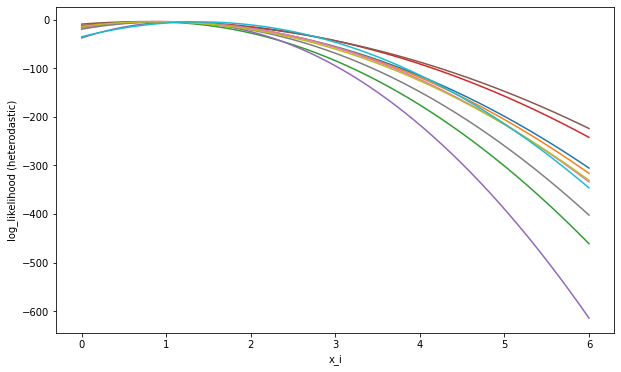

In [22]:
plt.figure(figsize=(10, 6))

for i in range(0, N): 
    
    plt.plot(x_i, log_likelihoods_hetero[i])
    
plt.xlabel("x_i")
plt.ylabel("log_likelihood (heterodastic)")

In [23]:
sum_log_likelihood_hetero = np.sum(log_likelihoods_hetero,axis=0)
max_likelihood_hetero = x_i[np.argmax(sum_log_likelihood_hetero)]
estimator_max_likelihood_hetero = np.average(x_norm_hetero, weights=sigma_norm)  # weighted mean as estimator

I now plot the result of this heterodastic-error analysis:

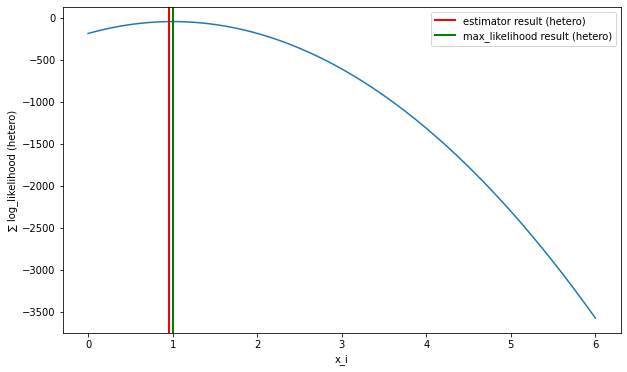

In [24]:
plt.figure(figsize=(10, 6))
plt.plot(x_i, sum_log_likelihood_hetero)
plt.axvline(x = estimator_max_likelihood_hetero, color = 'red', label = 'estimator result (hetero)', lw=2)
plt.axvline(x = max_likelihood_hetero, color = 'green', label = 'max_likelihood result (hetero)', lw=2)

plt.xlabel("x_i")
plt.ylabel("∑ log_likelihood (hetero)")
plt.legend();

Again, I cannot resolve the two values, so I print the two results. 

In [25]:
print("max_likelihood: ", max_likelihood_hetero, "estimator: ", estimator_max_likelihood_hetero)

max_likelihood:  1.003003003003003 estimator:  0.9622501429838242


## 2) Fisher matrix to obtain the uncertainty estimate:

In this section I will adapt the code I wrote in "Part 2" to the requirement of a heterodestic data set: 

In [26]:
diff_hetero = np.diff(sum_log_likelihood_hetero, n=2)

In [27]:
sec_der_hetero = np.sqrt(-1 * diff_hetero / (x_i[1] - x_i[0])**2)

In [28]:
fisher_hetero = 1/sec_der_hetero[0]
estimator_hetero = np.sum(1 / (sigma_norm**2))**(-1/2)

In [29]:
distribution_hetero = log_likelihood(x_i, max_likelihood_hetero, estimator_hetero)
distribution_unc_est_hetero = log_likelihood(x_i, max_likelihood_hetero, fisher_hetero)

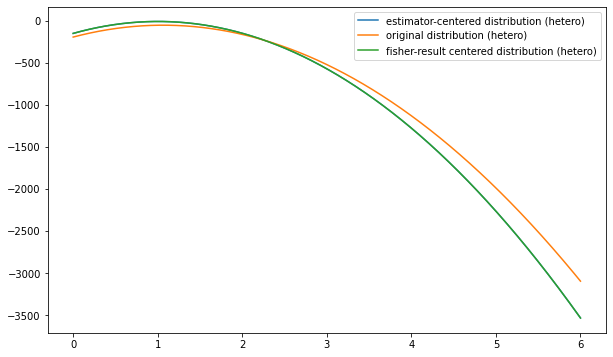

In [30]:
plt.figure(figsize=(10, 6))
plt.plot(x_i, distribution_hetero, label="estimator-centered distribution (hetero)")
plt.plot(x_i, sum_log_likelihood, label="original distribution (hetero)")
plt.plot(x_i, distribution_unc_est_hetero, label="fisher-result centered distribution (hetero)")

plt.legend()

They are similar! I double check the results:

In [31]:
print("fisher: ", fisher_hetero, "estimator: ", estimator_hetero)

fisher:  0.05947572273807227 estimator:  0.059475722738152347
